### ANUSHA KASA
#### Machine Learning Supervised CART
#### CART Regression with Scikit-Learn: Overview
#### A decision tree builds regression or classification models in the form of a tree structure.

#### Regression trees are needed when the response variable is numeric or continuous.

##### In either case, the predictors or independent variables may be categorical or numeric. It is the target variable that determines the type of decision tree needed.

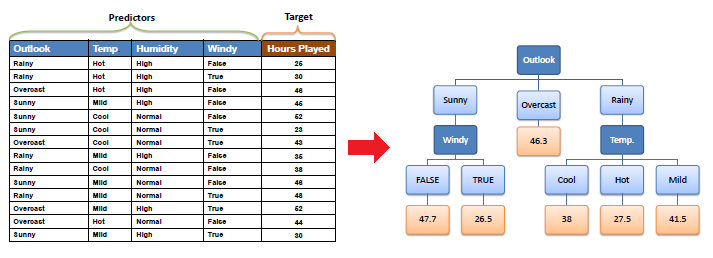

### Python: Scikit-Learn Library
The scikit-learn project started as scikit.learn, a Google Summer of Code project by David Cournapeau.

Its name stems from the notion that it is a "SciKit' (SciPy Toolkit), a separately developed and distributed third-party extension to SciPy.

The original codebase was later rewritten by other developers:

In 2010 Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort, and Vincent Michel, all from INRIA, took leadership of the project.
They made the first public release on February the 1st 2010.
As of 2018, scikit-learn is under active development.
Scikit-leam provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python. It is licensed under a permissive simplified BSD license and is distributed under many Linux distributions, encouraging academic and commercial use.

The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-leam.

This stack includes:

>NumPy: Base n-dimensional array package
>SciPy: Fundamental library for scientific computing
>Matplotlib: Comprehensive 2D/3D plotting
>IPython: Enhanced interactive console
>Sympy: Symbolic mathematics
>Pandas: Data structures and analysis
    
### K-Fold Cross-Validation
In K Fold cross-validation, the data is divided into k subsets.

One of the k subsets is used as the test set/ validation set and the other k-l subsets are put together to form a training set.

The error estimation is averaged over all k trials to get the total effectiveness of our model.

In the following illustration K-Fold = 4

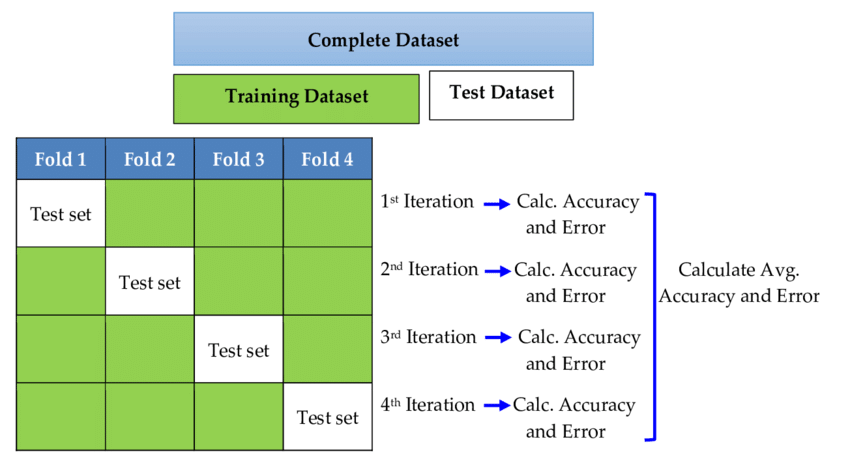

#### Negative Mean Squared Error (Negative MSE)
In statistics, the mean squared error (MSE) or mean squared deviation (MSD) of an estimator ( a procedure for estimating an unobserved quantity) measures the average of the squares of the errors or deviation, i.e., the difference between the estimator and what is estimated.

MSE is a risk function, corresponding to the expected value of the squared error loss or quadratic loss.

The difference occurs because of randomness or because the estimator doesn't account for information that could produce a more accurate estimate.

The MSE is a measure of the quality of an estimator.

In the general case, it is non-negative, and values closer to zero are better.

IMPORTANT NOTES: In scikit-learn, mean squared error values are inverted, i.e., negative

#### Data Set is the housing_boston.csv
We will investigate the Boston House Price dataset as you did with the linear regression homework. Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are defined as follows:
#CRIM: This is the per capita crime rate by town
#ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq. ft.
#INDUS: This is the proportion of non-retail business acres per town.
#CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
#NOX: This is the concentration of the nitric oxide (parts per 10 million)
#RM: This is the average number of rooms per dwelling
#AGE: This is the proportion of owner-occupied units built prior to 1940
#DIS: This is the weighted distances to five Boston employment centers
#RAD: This is the index of accessibility to radial highways
#TAX: This is the full-value property-tax rate per 10,000 dollars
#PTRATIO: This is the pupil-teacher ratio by town
#AA: This is calculated as 1000(AA — 0.63)², where AA is the proportion of people of African American descent by town
#LSTAT: This is the percentage lower status of the population
#MEDV: This is the median value of owner-occupied homes in $1000s

#### Note: For this assignment, we use a subset of the original dataset.

#CRIM: per capita crime rate by town
#INDUS: proportion of non-retail business acres per town
#TAX: full-value property-tax rate per 10,000 dollars
#MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Libraries

In [1]:
# Import Python Libraries: NumPy and Pandas

import pandas as pd
import numpy as np

# Import Libraries & modules for data visualization

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Import scit-Learn module for the algorithm/model: DecisionTreeRegressor

from sklearn. tree import DecisionTreeRegressor

# Import scikit-Learn module to split the dataset into train/ test sub-datasets

from sklearn.model_selection import train_test_split

# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Load Data

In [2]:
# Specify location of the dataset.  Be sure to  NOT  use the housing_boston_w_hdrs.csv!

housingfile = 'C:/Users/kasaa/Downloads/housing boston (2).csv'

In [3]:
# Load the data into a Pandas DataFrame

df= pd.read_csv (housingfile, header=None)


In [4]:
# Specify the fields with their names

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'AA',
'LSTAT', 'MEDV']

# Load the data into a Pandas DataFrame

df = pd.read_csv(housingfile, names=names)

In [5]:
#  Look at the first 5 rows of data

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AA,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Preprocess the Dataset:
##### Clean Data: Find & Mark Missing Values

In [6]:
df.isnull().sum()

# We see there are no missing data points

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
AA         0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
# Now let's say we want to decrease the amount of variables in our heatmap.  We would use the following code.  This will be on the final!
#  Remember how to make a subset.  Try using different variables.

df2= df[['CRIM','INDUS', 'TAX','MEDV']]

# We will use df2 for the rest of the calculations.

In [8]:
df2.head()

,CRIM,INDUS,TAX,MEDV
0,0.00632,2.31,296,24.0
1,0.02731,7.07,242,21.6
2,0.02729,7.07,242,34.7
3,0.03237,2.18,222,33.4
4,0.06905,2.18,222,36.2


### Performing the Exploratory Data Analysis (EDA)

In [9]:
# Get the number of records/rows, and the number of variables/columns 

print(df2.shape)

(452, 4)


In [10]:
# Get the data types of all variables

print(df2.dtypes)

CRIM     float64
INDUS    float64
TAX        int64
MEDV     float64
dtype: object


In [11]:
# Obtain the summary statistics of the data

print(df2.describe())


             CRIM       INDUS         TAX        MEDV
count  452.000000  452.000000  452.000000  452.000000
mean     1.420825   10.304889  377.442478   23.750442
std      2.495894    6.797103  151.327573    8.808602
min      0.006320    0.460000  187.000000    6.300000
25%      0.069875    4.930000  276.750000   18.500000
50%      0.191030    8.140000  307.000000   21.950000
75%      1.211460   18.100000  411.000000   26.600000
max      9.966540   27.740000  711.000000   50.000000


### Create a Histogram

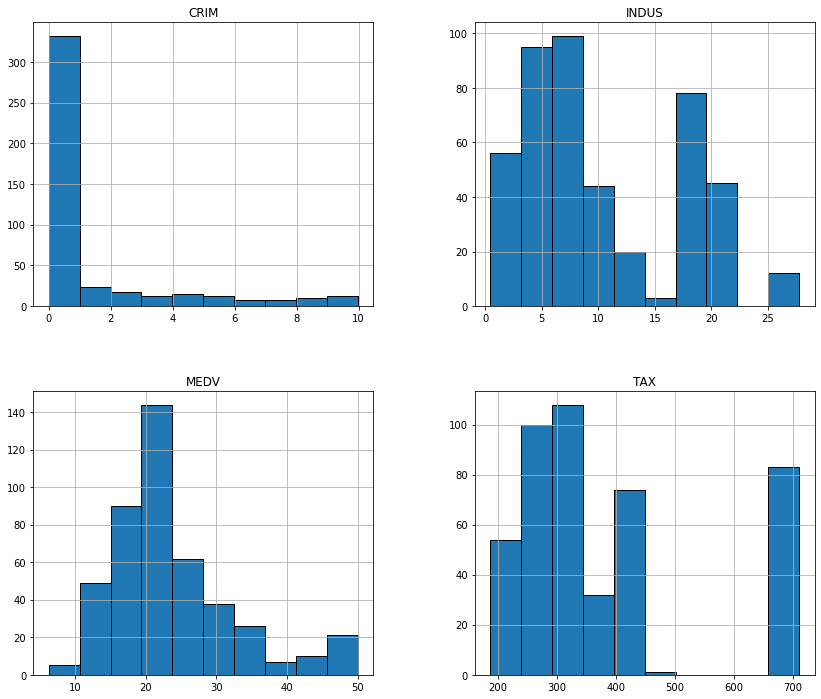

In [12]:
# Plot histogram for each variable. I encourage you to work with the histogram. Remember what you did in the previous homework.

df2.hist(edgecolor= 'black',figsize=(14,12))
plt.show()

### Scatter Matrix Plot

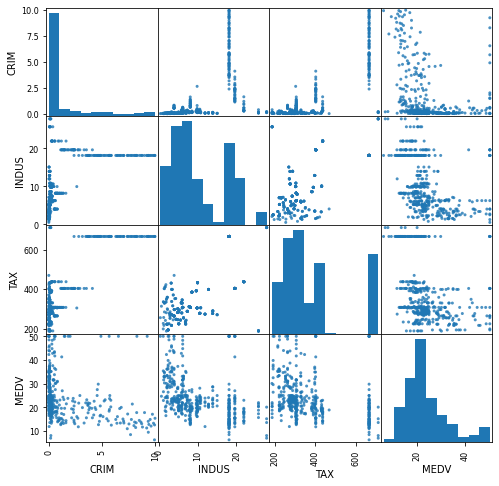

In [13]:
# Create scatter plot matrix

scatter_matrix(df2, alpha=0.8, figsize=(8,8))
plt.show()

#### Join Plots with Seaborn

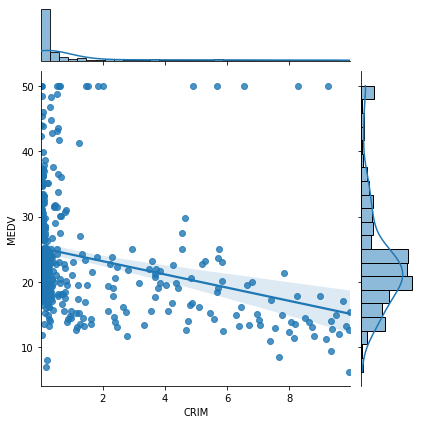

In [14]:
sns.jointplot(data=df2, x="CRIM", y="MEDV", kind="reg")

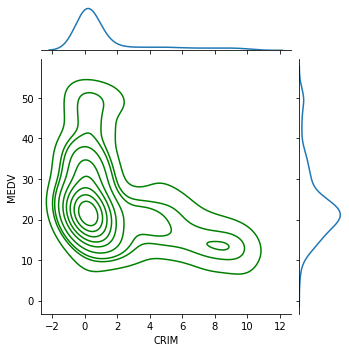

In [15]:
#Join plot with CRIM and MEDV

sns.jointplot(x = 'CRIM', y = 'MEDV', data = df2, kind = 'kde', height = 5, joint_kws={'color':'green'})
plt.show()

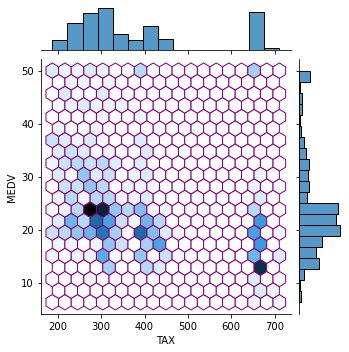

In [16]:
#Join plot with TAX and MEDV

sns.jointplot(x = 'TAX', y = 'MEDV', data = df2, kind = 'hex', height = 5, joint_kws={'color':'purple'})
plt.show()

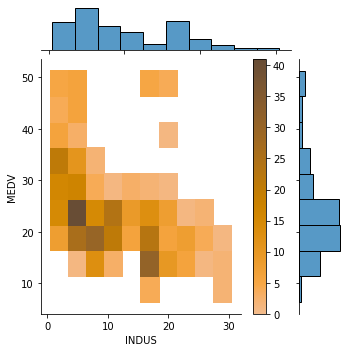

In [17]:
# Join plot with TAX and MEDV 

sns.jointplot(x = 'INDUS', y = 'MEDV', data=df2, height = 5, joint_kws={'color':'orange'}, kind = 'hist', binwidth=(3,5), cbar=True)
plt.show()

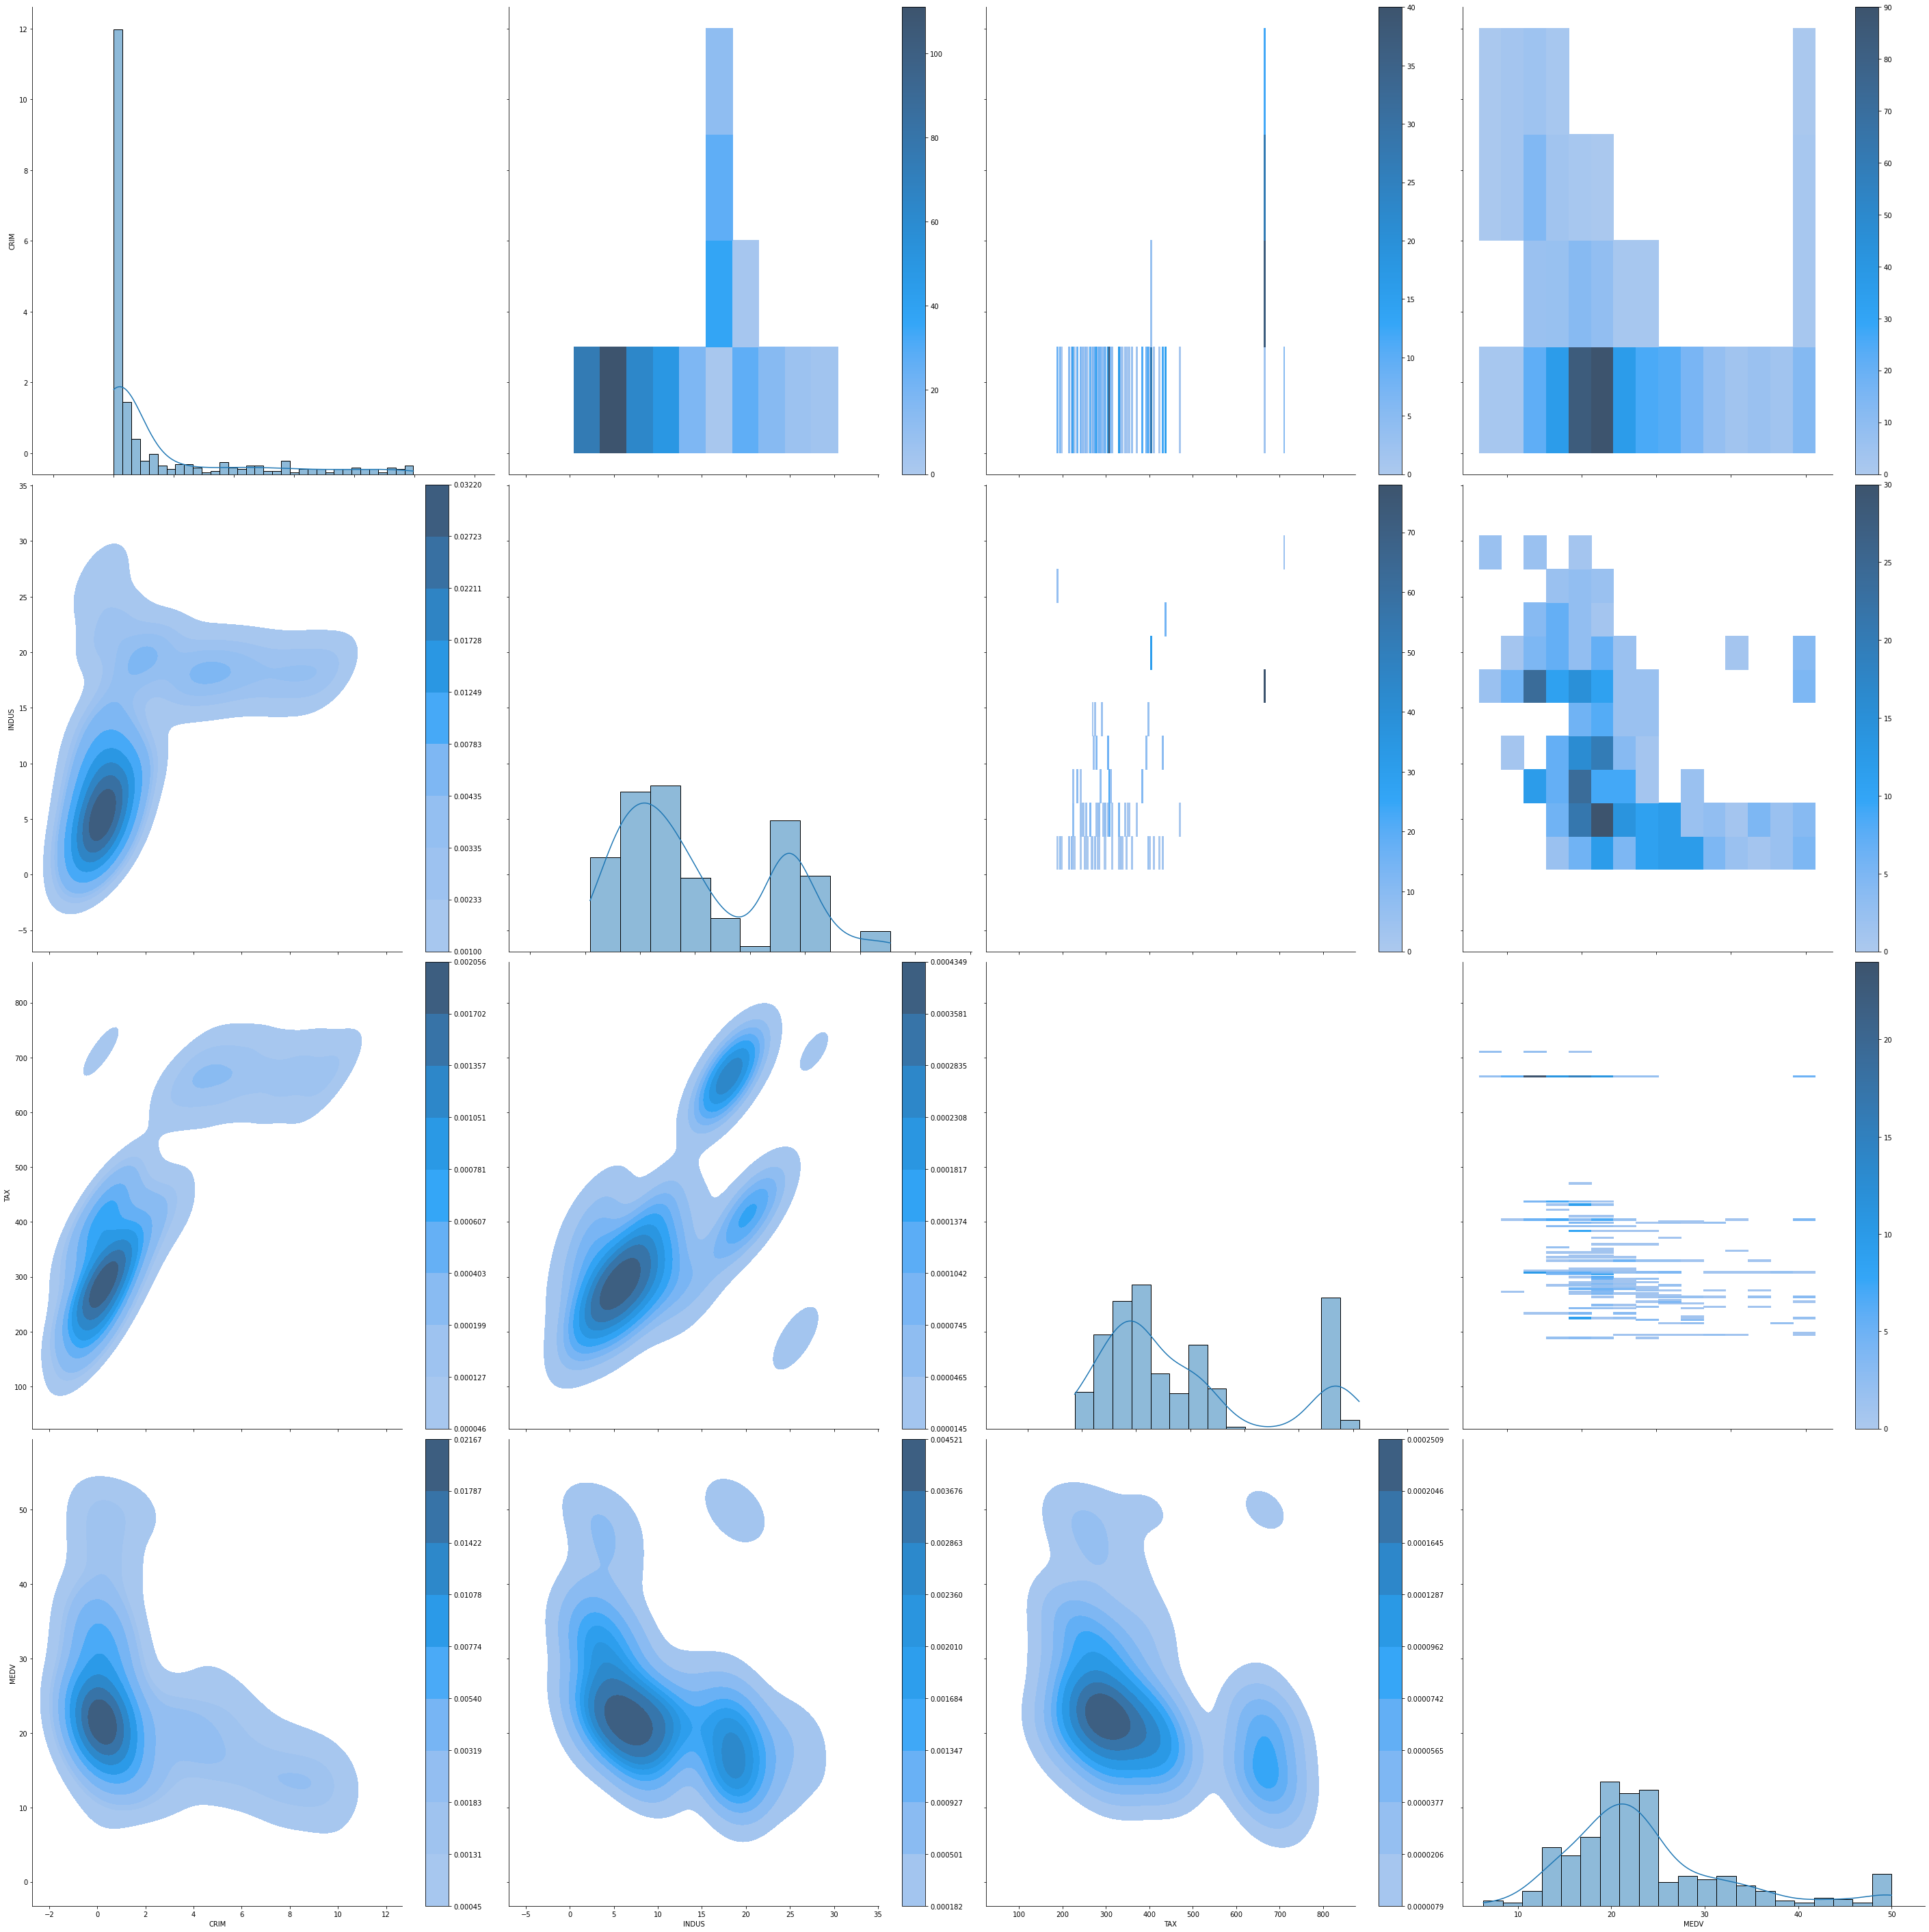

In [20]:
# Now we will combine the join plots

g = sns.PairGrid(df2, height= 10)
g.map_upper(sns.histplot, bins= 20, binwidth=3, cbar=True)
g.map_lower(sns.kdeplot, fill=True, cbar=True)
g.map_diag(sns.histplot, kde=True, cbar=True)

### Separate Dataset into Input & Output Arrays

In [21]:
from sklearn.model_selection import train_test_split

# Store the dataframe values into a numPy array

#array= df2.values

# Separate the array into input and output components by slicing (you used this in your homework)
# For X (input) [:,3] --> All the rows and columns from 0 up to 3

#X = array [:, 0:3]
# x consists of all columns other than MEDV
X = df2.drop(['MEDV'],axis=1)


# For Y (output) [:3] --> All the rows in the last column (MEDV)
#Y = array [:,3]
#Y contains MEDV column
Y=df2['MEDV']

#### Split into Input/Output Array into Training/Testing Datasets

In [22]:
# Split the dataset --> training sub-dataset:  67%, and test sub-dataset:  33%

test_size = 0.33

# Selection of records to inclue in which sub-dataset must be done randomly - use the for seed radomization

seed = 7

# Split the dataset (both input & output) into training/testing datasets

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.33, random_state=seed)

#### Build and Train the Model

In [23]:
# Build the model

model = DecisionTreeRegressor(random_state=seed)

# Train the model using the training sub-dataset

model.fit(X_train,Y_train)

# Non-Linear --> NO coefficients and the intercept

DecisionTreeRegressor (criterion='mse', max_depth=None, max_features=None,
max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=2,
min_samples_split=2, min_weight_fraction_leaf=0.0 ,presort=False, random_state=seed,
splitter='best')

DecisionTreeRegressor(min_samples_leaf=2, presort=False, random_state=7)

#### Calculate R-Squared

In [24]:
R_squared = model.score(X_test, Y_test)
pri
nt('R-Squared = ', R_squared)

R-Squared =  -0.04775035045890075


In [25]:
model.predict([[12,10,450]])

array([12.6])

In [26]:
model.predict([[2,30,50]])

array([7.])

We have now trained the model. Let’s use the trained model to predict the “Median value of owner-occupied homes in 1000 dollars” (MEDV).
We are using the following predictors for the 1st prediction:
#CRIM: per capita crime rate by town: 12
#INDUS: proportion of non-retail business acres per town: 10
#TAX: full-value property-tax rate per $10,000: 450

Notes: So, the model predicts that the median value of owner-occupied homes in 1000 dollars in the above suburb should be around $12,600.
We are using the following predictors for the 2nd prediction:
#CRIM: per capita crime rate by town: 2
#INDUS: proportion of non-retail business acres per town: 30
#TAX: full-value property-tax rate per $10,000: 50

Notes: So, the model predicts that the median value of owner-occupied homes in 1000 dollars in the above suburb should be around $15,700.

    
### Evaluate/Validate Algorithm/Model, Using K-Fold Cross-Validation

In [27]:
# Evaluate the algorithm
# Specify the K-size

num_folds = 10

# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated

seed = 7

# Split the whole data set into folds

kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm

scoring = 'neg_mean_squared_error'

# Train the model and run K-foLd cross-validation to validate/evaluate the model

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation

print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())


Average of all results from the K-fold Cross Validation, using negative mean squared error: -76.82251835748792


In [28]:
import seaborn as sns
print(sns.__version__)

0.11.1
